# Least Squares Fitting Package

This notebook provides a more compact package for doing least squares fitting of your data. More detailed explanations of the process are provided in the Fitting Introduction in the notebook "Experiment-01-Fitting.ipnyb".

The code below assumes that your data is in four-column format, with the columns containing x, uncertainty in x, y, and uncertainty in y. The first row is assumed to be a header line and is ignored. You can copy this code by cutting and pasting the whole cell containing the code. Typically you will need to modify:
- the name of your data file - modify the line containing "fname = ..." 
- your fitting function - modify the line "def fit_function(....)" and "return ..."
- your initial guesses for the parameters
- the parameter names in "param_names = ..."
- the name of the file used to save the final figure


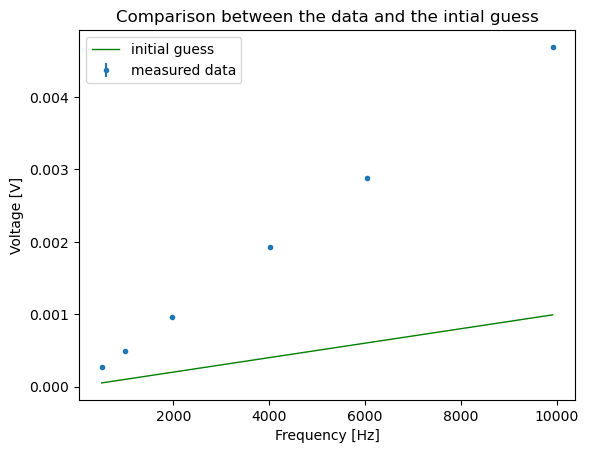

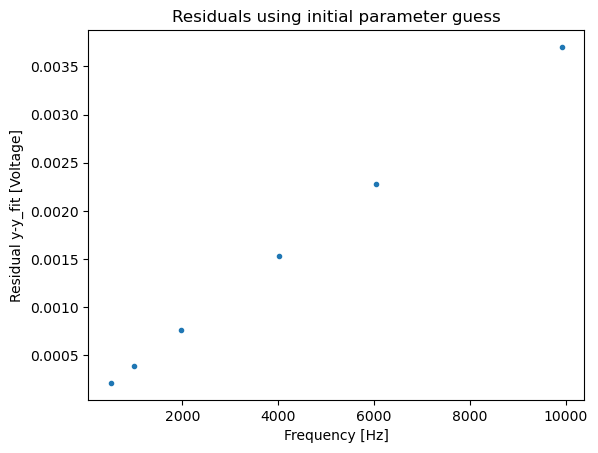


Goodness of fit - chi square measure:
Chi-squared =  7192.487745155558
Chi-squared/dof =  1798.1219362888894
Fit parameters:
slope = 4.735e-07 +/- 2.163e-11
intercept = 2.456e-05 +/- 1.997e-08


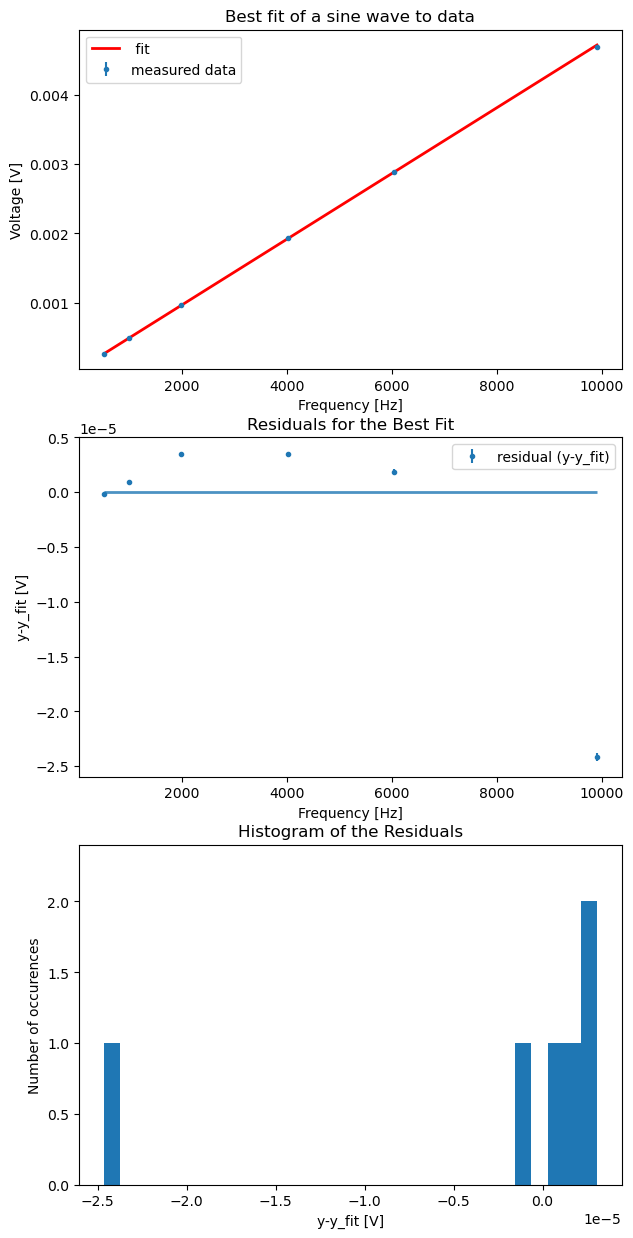

In [1]:
# The script below fits to a sine wave, but can be modified for other functions
# First, we load some python packages
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# LIST OF ALL INPUTS

# fname is assumed to be in a four-column .csv file (comma separated values). The first two rows are
# assumed to be headers, like those produced in our code for packing oscilloscope data.
# The four columns are x-values, x-uncertainties, y-values, y-uncertainties.
# The .csv file must be in the same
# folder as this fit program, otherwise the full file extension must be added
# to fname: e.g. fname = 'folder/subfolder/subsubfolder/file.csv'

"""
Modify the following line to change the file name containing your data
"""
fname = "RC-tau_data.csv"

x_name = "Frequency"
x_units = "Hz"
y_name = "Voltage"
y_units = "V"

# The model you will fit to is defined below, in this case a sine wave.
# The parameters in the model are amplitude, freqency, and phase.
# To get a least squares fitting process started, it is necessary to provide good
# initial guesses for the parameters. From your plots of the data so far, you can make good guesses at these parameters.

"""
Modify the following two lines to change the parameter names and to set initial guesses for the parameters
"""
param_names = ["slope", "intercept"]
guesses = (1e-7,0)


# definition of the fit function
# def fit_function(x, amplitude,tau):

"""
Modify the following two lines to change the fitting model and the parameters in that model
"""


def fit_function(x, slope, intercept):
    return x*slope + intercept


# load the file "fname", defined above
data = np.loadtxt(fname, delimiter=",", comments="#", usecols=(0, 1, 2, 3), skiprows=2)

# access the data columns
x = data[:, 0]
y = data[:, 2]
y_sigma = data[:, 3]


# define an array of frequency points for plotting the theory function
xtheory = np.linspace(min(x), max(x), 500)
# compares the guessed curve to the data for visual reference
y_guess = fit_function(xtheory, *guesses)
plt.errorbar(x, y, yerr=y_sigma, marker=".", linestyle="", label="measured data")
plt.plot(
    xtheory,
    y_guess,
    marker="",
    linestyle="-",
    linewidth=1,
    color="g",
    label="initial guess",
)
plt.xlabel("{} [{}]".format(x_name, x_units))
plt.ylabel("{} [{}]".format(y_name, y_units))
plt.title(r"Comparison between the data and the intial guess")
plt.legend(loc="best", numpoints=1)
plt.show()


# calculate the value of the model at each of the x-values of the data set
y_fit = fit_function(x, *guesses)
# residual is the difference between the data and theory
residual = y - y_fit

# plot the residuals
plt.errorbar(x, residual, yerr=y_sigma, marker=".", linestyle="", label="residuals")
plt.xlabel("{} [{}]".format(x_name, x_units))
plt.ylabel("Residual y-y_fit [{}]".format(y_name, y_units))
plt.title("Residuals using initial parameter guess")
plt.show()

# fit the data to fit_function. fit_params is the resultant parameters, fit_cov
# is the covariance matrix between all the parameters. maxfev=10**5 means the
# fitting procedure is iterated at maximum 10^5 times before giving up.
fit_params, fit_cov = curve_fit(
    fit_function, x, y, sigma=y_sigma * np.ones(len(x)), p0=guesses, maxfev=10**5
)
# fit_params,fit_cov = curve_fit(fit_function,x,y,sigma=y_sigma,p0=guesses,
#                               maxfev=10**5)

###############################################################################
# prints the chi2
# ##############################################################################


# function that  calculates the chi square value of a fit
def chi_square(fit_parameters, x, y, sigma):
    if sigma is None:
        sigma = 1.0
    return np.sum((y - fit_function(x, *fit_parameters)) ** 2 / sigma**2)


# calculate and print chi square as well as the per degree-of-freedom value
chi2 = chi_square(fit_params, x, y, y_sigma)
dof = len(x) - len(fit_params)
print("\nGoodness of fit - chi square measure:")
print("Chi-squared = ", chi2)
print("Chi-squared/dof = ", chi2 / dof)

###############################################################################
# prints the fit parameters (with uncertainty)
# ##############################################################################

# the covariance matrix is rescaled to cancel the inverse scaling that is
# performed for numerical reasons during execution of curve_fit -- do not
# change this line!
fit_cov = fit_cov * dof / chi2
# calculate the standard deviation as uncertainty of the fit parameters
fit_params_error = np.sqrt(np.diag(fit_cov))

# read out parameter results
print("Fit parameters:")
for i in range(len(fit_params)):
    print(
        "{} = {:.3e} +/- {:.3e}".format(
            param_names[i], fit_params[i], fit_params_error[i]
        )
    )


# prints out the covariance between all variables. Uncomment this code to see
# the results of this more sophisticated statistical measure.
# print "\nCovariance between fit parameters:"
# for i,fit_covariance in enumerate(fit_cov):
#    for j in xrange(i+1,len(fit_covariance)) :
#        print "{} and {} : {:.3e}".format(param_names[i],
#                                          param_names[j],
#                                          fit_cov[i,j])


# residual is the difference between the data and model
x_fitfunc = np.linspace(min(x), max(x), 500)
y_fitfunc = fit_function(x_fitfunc, *fit_params)
y_fit = fit_function(x, *fit_params)
residual = y-y_fit
# creates a histogram of the residuals
hist,bins = np.histogram(residual,bins=30)

fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(311)
ax1.errorbar(x,y,yerr=y_sigma,marker='.',linestyle='',label="measured data")
ax1.plot(x_fitfunc,y_fitfunc,marker="",linestyle="-",linewidth=2,color="r",
         label=" fit")
# add axis labels and title
ax1.set_xlabel('{} [{}]'.format(x_name,x_units))
ax1.set_ylabel('{} [{}]'.format(y_name,y_units))
ax1.set_title('Best fit of a sine wave to data')
# set the x and y boundaries of your plot
#plt.xlim(lower_x,upper_x)
#plt.ylim(lower_y,upper_y)
# show a legend. loc='best' places legend where least amount of data is 
# obstructed. 
ax1.legend(loc='best',numpoints=1)


# this code produces a figure with a plot of the residuals as well
# as a histogram of the residuals. 
# fig = plt.figure(figsize=(7,10))
ax2 = fig.add_subplot(312)
ax2.errorbar(x,residual,yerr=y_sigma,marker='.',linestyle='',
             label="residual (y-y_fit)")
ax2.hlines(0,np.min(x),np.max(x),lw=2,alpha=0.8)
ax2.set_xlabel('{} [{}]'.format(x_name,x_units))
ax2.set_ylabel('y-y_fit [{}]'.format(y_units))
ax2.set_title('Residuals for the Best Fit')
ax2.legend(loc='best',numpoints=1)
ax3 = fig.add_subplot(313)
ax3.bar(bins[:-1],hist,width=bins[1]-bins[0])

ax3.set_ylim(0,1.2*np.max(hist))
ax3.set_xlabel('y-y_fit [{}]'.format(y_units))
ax3.set_ylabel('Number of occurences')
ax3.set_title('Histogram of the Residuals')

"""
Modify the following lines to change the name of the file used to store a JPEG of your best fit graphs
"""

# Before showing the plot, you can also save a copy of the figure as a JPEG.
# The order is important here because plt.show clears the plot information after displaying it. 
plt.savefig('FittingResults.jpeg')
plt.show()